In [3]:
%run -i ./../common/common
%run -i ./../source_sink/source
%run -i ./freestream
%matplotlib inline

In [4]:
N = 200
rect = Rect(-4.0, 4.0, -2.0, 2.0)
grid = rect.make_grid(N)

In [5]:
source = Source(-1.0, 0.0, 5.0)

In [6]:
size = 10

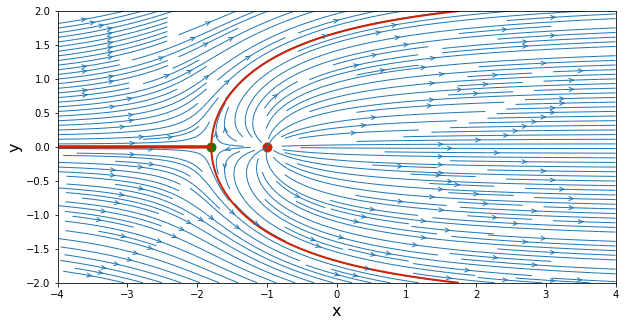

In [7]:
stream = Freestream(vel_inf=1.0)

u_src, v_src = source.velocity(grid)
u_str, v_str = stream.velocity(grid)
u = u_src + u_str
v = v_src + v_str

setup_fig(rect, size)
plt.streamplot(*grid, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(*source.coords, color='#CD2305', s=80, marker='o')

stagnation = (source.coords.x - source.strength/(2.0*np.pi*stream.vel_inf), source.coords.y)
plt.scatter(*stagnation, color='g', s=80, marker='o')

levels = [-source.strength/2.0, +source.strength/2.0]
pot_src = source.potential(grid)
pot_str = stream.potential(grid)
potential = pot_src + pot_str
plt.contour(*grid, potential, levels=levels,\
             colors='#CD2305', linewidths=2, linestyles='solid')

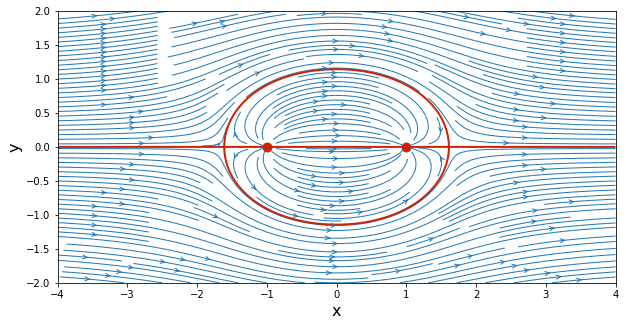

In [8]:
sink = Source(1.0, 0.0, -5.0)
u_sink, v_sink = sink.velocity(grid)
pot_sink = sink.potential(grid)

u = u_src + u_str + u_sink
v = v_src + v_str + v_sink
potential = pot_src + pot_str + pot_sink

setup_fig(rect, size)
plt.streamplot(*grid, u, v,\
               density=2, linewidth=1, arrowsize=1, arrowstyle='->')

source_sink_coords = [[source.x, sink.x], [source.y, sink.y]]
plt.scatter(*source_sink_coords, color='#CD2305', s=80, marker='o')
plt.contour(*grid, potential, levels=[0.0], \
            colors='#CD2305', linewidths=2, linestyles='solid')

In [10]:
def pressure_field(grid: Grid, vel_inf: float) -> 'numpy.ndarray':
    u, v = grid
    return 1.0 - (u**2 + v**2)/vel_inf**2

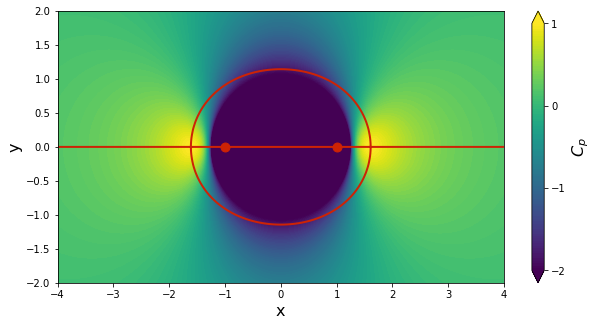

In [11]:
cp = pressure_field((u, v), stream.vel_inf)

setup_fig(rect, size)

contf = plt.contourf(*grid, cp, levels=np.linspace(-2.0, 1.0, 100), extend='both')
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])

plt.scatter(*source_sink_coords, color='#CD2305', s=80, marker='o')
plt.contour(*grid, potential, levels=[0.0], \
            colors='#CD2305', linewidths=2, linestyles='solid')